In [5]:
# 1 - Importar libs e dataset

import pandas as pd
import numpy as np

link = "C:/Users/CarlosViniMSouza/Documents/Projects/data-mining-ifam/database/result.csv"

dataset = pd.read_csv(link)

In [6]:
# 2 - Destinar features e coluna-alvo

featureNames = ['risk_score', 'amount_requested', 'has_debt', 'income']

X = dataset.drop(['e_signed'], axis=1)
y = dataset['e_signed']

In [7]:
# 3 - Dividindo os dados de treino e teste

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [8]:
# 4 - Checando proporções de treino e teste

print(f"Shape de treino: {X_train.shape}")

print(f"Shape de teste: {X_test.shape}")

Shape de treino: (12535, 17)
Shape de teste: (5373, 17)


In [9]:
# 3 - Definindo classificador (Com valores padrão)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [10]:
# 4 - TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [11]:
# 5 - TEST

model.fit(X_test, y_test)
model.score(X_test, y_test)

1.0

In [12]:
# 6 - Resultado

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print(score)

1.0


## Vamos testar alguns parâmetros do tipo **critério**:

1. `gini (valor padrão)`
2. `entropy`
3. `log_loss`

## E três parâmetros especifícos:

1. `max_depth`
2. `min_samples_split`
3. `splitter`

1. Do tipo critério, vamos usar o valor `entropy`

In [13]:
# Melhor resultado obtido: [max_depth=1000, min_samples_split=10]

model = DecisionTreeClassifier(
    criterion='entropy', 
    splitter="best", 
    max_depth=1000, 
    min_samples_split=10
)

In [14]:
# TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9254886318308736

In [15]:
# TESTE

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.9227619579378373

In [16]:
# Resultado

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print(score)

0.9227619579378373


2. Do tipo critério, o `log_loss`

In [17]:
# Melhor resultado obtido: [max_depth=1000, min_samples_split=10]

model = DecisionTreeClassifier(
    criterion='log_loss', 
    splitter="best",
    max_depth=1000, 
    min_samples_split=10
)

In [18]:
# TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9258077383326685

In [19]:
# TESTE

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.9231341894658478

In [20]:
# Resultados

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print(score)

0.9231341894658478


## Bem, agora vamos documentar e testar outros valores para comprovar que o resultado anterior foi o melhor possivel

### Mas antes, vamos deixar algumas coisas enclarecidas:

1. `max_depth` trabalhará com valores múltiplos de 100 (de 100 a 1000), 
2. `min_samples_split` trabalhará com valores múltiplos de 5 (de 5 a 50),

Com isso, o notebook poderá trabalhar mais efetivamente (*sem interferir muito na acurácia*).

1. Do tipo critério, o `entropy`

In [21]:
# Vamos até o max_depth=500 
for max_depth_loop in range(100, 600, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='entropy', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_test, y_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(model.score(X_test, y_test), 4)}")
    print("\n")

Acuracia com intervalo [100, 10] => 0.9239
Acuracia com intervalo [100, 20] => 0.8526
Acuracia com intervalo [100, 30] => 0.8161
Acuracia com intervalo [100, 40] => 0.7854
Acuracia com intervalo [100, 50] => 0.764


Acuracia com intervalo [200, 10] => 0.9235
Acuracia com intervalo [200, 20] => 0.8528
Acuracia com intervalo [200, 30] => 0.8152
Acuracia com intervalo [200, 40] => 0.7884
Acuracia com intervalo [200, 50] => 0.7644


Acuracia com intervalo [300, 10] => 0.9263
Acuracia com intervalo [300, 20] => 0.8537
Acuracia com intervalo [300, 30] => 0.8172
Acuracia com intervalo [300, 40] => 0.7869
Acuracia com intervalo [300, 50] => 0.764


Acuracia com intervalo [400, 10] => 0.9244
Acuracia com intervalo [400, 20] => 0.8537
Acuracia com intervalo [400, 30] => 0.8169
Acuracia com intervalo [400, 40] => 0.7884
Acuracia com intervalo [400, 50] => 0.7647


Acuracia com intervalo [500, 10] => 0.9216
Acuracia com intervalo [500, 20] => 0.853
Acuracia com intervalo [500, 30] => 0.8169
Acurac

In [22]:
# Vamos do max_depth=500 ao max_depth=1000
for max_depth_loop in range(600, 1100, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='entropy', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_test, y_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(model.score(X_test, y_test), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.9237
Acuracia com intervalo [600, 20] => 0.8541
Acuracia com intervalo [600, 30] => 0.8159
Acuracia com intervalo [600, 40] => 0.7871
Acuracia com intervalo [600, 50] => 0.7655


Acuracia com intervalo [700, 10] => 0.9222
Acuracia com intervalo [700, 20] => 0.8543
Acuracia com intervalo [700, 30] => 0.817
Acuracia com intervalo [700, 40] => 0.7886
Acuracia com intervalo [700, 50] => 0.7642


Acuracia com intervalo [800, 10] => 0.9226
Acuracia com intervalo [800, 20] => 0.8535
Acuracia com intervalo [800, 30] => 0.8159
Acuracia com intervalo [800, 40] => 0.7893
Acuracia com intervalo [800, 50] => 0.7651


Acuracia com intervalo [900, 10] => 0.9235
Acuracia com intervalo [900, 20] => 0.8541
Acuracia com intervalo [900, 30] => 0.817
Acuracia com intervalo [900, 40] => 0.7875
Acuracia com intervalo [900, 50] => 0.7646


Acuracia com intervalo [1000, 10] => 0.9241
Acuracia com intervalo [1000, 20] => 0.8537
Acuracia com intervalo [1000, 30] => 0.8163
Ac

2. Do tipo critério, o `log_loss`

In [23]:
# Vamos até o max_depth=500
for max_depth_loop in range(100, 600, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='log_loss', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_test, y_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(model.score(X_test, y_test), 4)}")
    print("\n")

Acuracia com intervalo [100, 10] => 0.9224
Acuracia com intervalo [100, 20] => 0.8524
Acuracia com intervalo [100, 30] => 0.8169
Acuracia com intervalo [100, 40] => 0.7888
Acuracia com intervalo [100, 50] => 0.7646


Acuracia com intervalo [200, 10] => 0.9239
Acuracia com intervalo [200, 20] => 0.8528
Acuracia com intervalo [200, 30] => 0.817
Acuracia com intervalo [200, 40] => 0.7882
Acuracia com intervalo [200, 50] => 0.7651


Acuracia com intervalo [300, 10] => 0.9239
Acuracia com intervalo [300, 20] => 0.8532
Acuracia com intervalo [300, 30] => 0.8169
Acuracia com intervalo [300, 40] => 0.786
Acuracia com intervalo [300, 50] => 0.7647


Acuracia com intervalo [400, 10] => 0.9241
Acuracia com intervalo [400, 20] => 0.853
Acuracia com intervalo [400, 30] => 0.8159
Acuracia com intervalo [400, 40] => 0.7878
Acuracia com intervalo [400, 50] => 0.7644


Acuracia com intervalo [500, 10] => 0.9226
Acuracia com intervalo [500, 20] => 0.8535
Acuracia com intervalo [500, 30] => 0.8161
Acurac

In [24]:
# Vamos do max_depth=500 ao max_depth=1000
for max_depth_loop in range(600, 1100, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='log_loss', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_test, y_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(model.score(X_test, y_test), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.9237
Acuracia com intervalo [600, 20] => 0.8532
Acuracia com intervalo [600, 30] => 0.8163
Acuracia com intervalo [600, 40] => 0.7863
Acuracia com intervalo [600, 50] => 0.7646


Acuracia com intervalo [700, 10] => 0.9237
Acuracia com intervalo [700, 20] => 0.8535
Acuracia com intervalo [700, 30] => 0.8176
Acuracia com intervalo [700, 40] => 0.7873
Acuracia com intervalo [700, 50] => 0.7646


Acuracia com intervalo [800, 10] => 0.9248
Acuracia com intervalo [800, 20] => 0.853
Acuracia com intervalo [800, 30] => 0.8163
Acuracia com intervalo [800, 40] => 0.7876
Acuracia com intervalo [800, 50] => 0.7646


Acuracia com intervalo [900, 10] => 0.925
Acuracia com intervalo [900, 20] => 0.8524
Acuracia com intervalo [900, 30] => 0.8167
Acuracia com intervalo [900, 40] => 0.7875
Acuracia com intervalo [900, 50] => 0.7646


Acuracia com intervalo [1000, 10] => 0.9222
Acuracia com intervalo [1000, 20] => 0.8541
Acuracia com intervalo [1000, 30] => 0.8167
Ac

3. Do tipo critério, o `gini`

In [25]:
# Vamos até o max_depth=500
for max_depth_loop in range(100, 600, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='gini', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_test, y_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(model.score(X_test, y_test), 4)}")
    print("\n")

Acuracia com intervalo [100, 10] => 0.9144
Acuracia com intervalo [100, 20] => 0.853
Acuracia com intervalo [100, 30] => 0.8133
Acuracia com intervalo [100, 40] => 0.7824
Acuracia com intervalo [100, 50] => 0.7653


Acuracia com intervalo [200, 10] => 0.9149
Acuracia com intervalo [200, 20] => 0.8535
Acuracia com intervalo [200, 30] => 0.8137
Acuracia com intervalo [200, 40] => 0.7835
Acuracia com intervalo [200, 50] => 0.7657


Acuracia com intervalo [300, 10] => 0.9144
Acuracia com intervalo [300, 20] => 0.8537
Acuracia com intervalo [300, 30] => 0.8144
Acuracia com intervalo [300, 40] => 0.7826
Acuracia com intervalo [300, 50] => 0.7657


Acuracia com intervalo [400, 10] => 0.9146
Acuracia com intervalo [400, 20] => 0.8537
Acuracia com intervalo [400, 30] => 0.813
Acuracia com intervalo [400, 40] => 0.7824
Acuracia com intervalo [400, 50] => 0.7657


Acuracia com intervalo [500, 10] => 0.9146
Acuracia com intervalo [500, 20] => 0.8535
Acuracia com intervalo [500, 30] => 0.8144
Acura

In [26]:
# Vamos do max_depth=500 ao max_depth=1000
for max_depth_loop in range(600, 1100, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='gini', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_test, y_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(model.score(X_test, y_test), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.9153
Acuracia com intervalo [600, 20] => 0.853
Acuracia com intervalo [600, 30] => 0.8135
Acuracia com intervalo [600, 40] => 0.7828
Acuracia com intervalo [600, 50] => 0.7657


Acuracia com intervalo [700, 10] => 0.9149
Acuracia com intervalo [700, 20] => 0.8533
Acuracia com intervalo [700, 30] => 0.8137
Acuracia com intervalo [700, 40] => 0.7822
Acuracia com intervalo [700, 50] => 0.7657


Acuracia com intervalo [800, 10] => 0.9148
Acuracia com intervalo [800, 20] => 0.8537
Acuracia com intervalo [800, 30] => 0.8128
Acuracia com intervalo [800, 40] => 0.7826
Acuracia com intervalo [800, 50] => 0.7657


Acuracia com intervalo [900, 10] => 0.9149
Acuracia com intervalo [900, 20] => 0.8528
Acuracia com intervalo [900, 30] => 0.8143
Acuracia com intervalo [900, 40] => 0.783
Acuracia com intervalo [900, 50] => 0.7657


Acuracia com intervalo [1000, 10] => 0.9149
Acuracia com intervalo [1000, 20] => 0.853
Acuracia com intervalo [1000, 30] => 0.8148
Acu

## Bem, com isso, podemos tirar algumas conclusões:

1. Conforme aumentamos o número do `min_samples_split`, menor será a acurácia.
2. O 1° resultado de cada loop é sempre o mais elevado.

Então, vamos documentar os resultados obtidos nos loops

## Resultados mais Próximos a Realidade

1. Em relação ao critério `entropy`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 50] | 0.7713 |
| [200, 50] | 0.7703 |
| [300, 50] | 0.7715 |
| [400, 50] | 0.7706 |
| [500, 50] | 0.7703 |
| [600, 50] | 0.7705 |
| [700, 50] | 0.7708 |
| [800, 50] | 0.7706 |
| [900, 50] | 0.7715 |
| [1000, 50]| 0.7717 |

2. Em relação ao critério `log_loss`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 50] | 0.7720 |
| [200, 50] | 0.7710 |
| [300, 50] | 0.7720 |
| [400, 50] | 0.7710 |
| [500, 50] | 0.7706 |
| [600, 50] | 0.7707 |
| [700, 50] | 0.7713 |
| [800, 50] | 0.7703 |
| [900, 50] | 0.7712 |
| [1000, 50]| 0.7710 |

3. Em relação ao critério `gini`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 50] | 0.7571 |
| [200, 50] | 0.7574 |
| [300, 50] | 0.7589 |
| [400, 50] | 0.7593 |
| [500, 50] | 0.7576 |
| [600, 50] | 0.7590 |
| [700, 50] | 0.7575 |
| [800, 50] | 0.7590 |
| [900, 50] | 0.7591 |
| [1000, 50]| 0.7593 |

## Resultados mais Otimistas

1. Em relação ao critério `entropy`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.9239 |
| [200, 10] | 0.9235 |
| [300, 10] | 0.9263 |
| [400, 10] | 0.9244 |
| [500, 10] | 0.9216 |
| [600, 10] | 0.9237 |
| [700, 10] | 0.9222 |
| [800, 10] | 0.9226 |
| [900, 10] | 0.9235 |
| [1000, 10]| 0.9241 |

2. Em relação ao critério `log_loss`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.9224 |
| [200, 10] | 0.9239 |
| [300, 10] | 0.9239 |
| [400, 10] | 0.9241 |
| [500, 10] | 0.9226 |
| [600, 10] | 0.9237 |
| [700, 10] | 0.9237 |
| [800, 10] | 0.9248 |
| [900, 10] | 0.9250 |
| [1000, 10]| 0.9222 |

3. Em relação ao critério `gini`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.9144 |
| [200, 10] | 0.9149 |
| [300, 10] | 0.9144 |
| [400, 10] | 0.9146 |
| [500, 10] | 0.9146 |
| [600, 10] | 0.9153 |
| [700, 10] | 0.9149 |
| [800, 10] | 0.9148 |
| [900, 10] | 0.9149 |
| [1000, 10]| 0.9149 |

### Parte de Visualização/Plotagem dos Resultados

1. Representação do Algoritmo

2. Matrix de Confusão

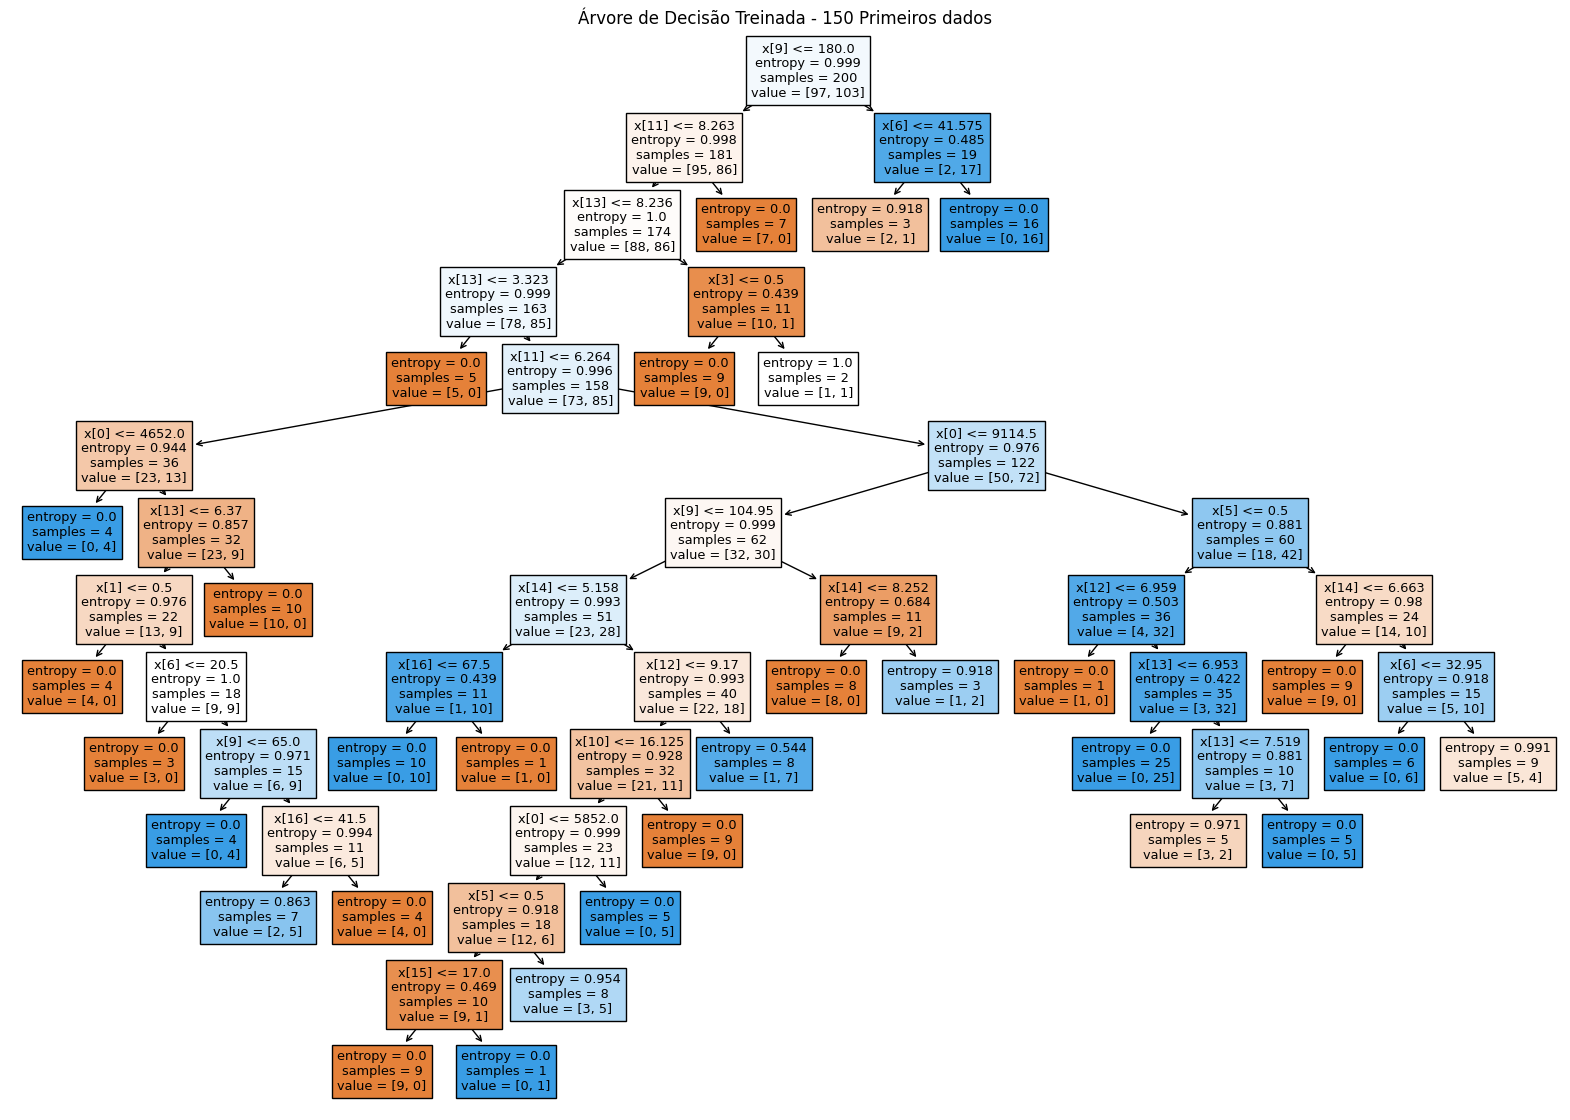

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))

model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=1000,
    min_samples_split=10
).fit(
    X_train[0:200], 
    y_train[0:200]
)

plot_tree(model, filled=True)

plt.title("Árvore de Decisão Treinada - 150 Primeiros dados")
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2492
           1       0.94      0.91      0.93      2881

    accuracy                           0.92      5373
   macro avg       0.92      0.92      0.92      5373
weighted avg       0.92      0.92      0.92      5373



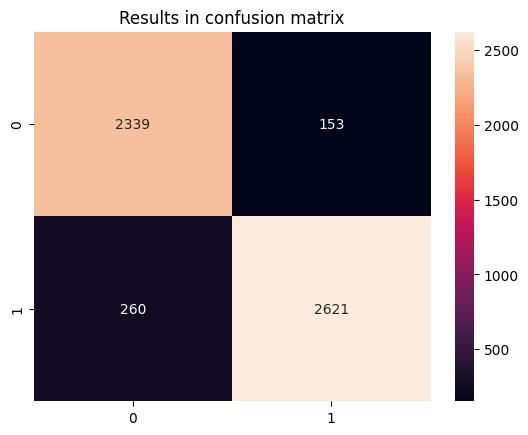

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

confMatrix = confusion_matrix(y_test, predictions)

sns \
    .heatmap(confMatrix, annot=True, fmt='d') \
    .set_title('Results in confusion matrix')

print(classification_report(y_test, predictions))

### Por fim, confira a predição do modelo melhorado

In [38]:
model = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=1000,
    min_samples_split=10
)

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.9235064209938582

In [39]:
from sklearn import metrics

y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

print(acc)

0.9235064209938582


### Basicamente, o valor do `Score de Teste` e o `Resultado da Predição` são idênticos ...

### Plotando outra matrix de confusão, para ver se ocorreu alguma alteração.

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2492
           1       0.95      0.91      0.93      2881

    accuracy                           0.92      5373
   macro avg       0.92      0.92      0.92      5373
weighted avg       0.92      0.92      0.92      5373



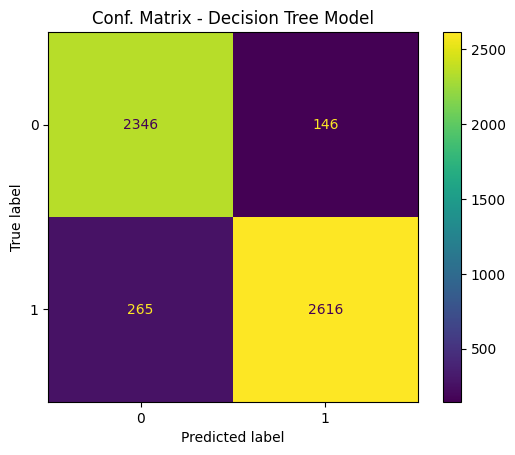

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Conf. Matrix - Decision Tree Model")

print(classification_report(y_test, y_pred))

`Fim dos Testes com Decision Tree! Vamos trabalhar com o algoritmo de Random Forest ...`